In [1]:
from utils.CaImageCSV import CaImageCSV

In [2]:
csv = CaImageCSV('./resources/ID181106CreA_Longitudinal_Traces.csv')

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [15]:
context_data = csv.filtered_by_context('HC2')
context_data

C000      C001      C002      C003      C004      C005  \
1   2                                                                      
HC2 1456.185  23.40221  18.30776  16.38554  117.8552  7.017669  22.18379   
NaN 1456.285  21.35612  16.70253  14.77743  105.7498  6.410332  20.08984   
    1456.385  27.63065  15.23804  13.32715  94.88789   5.85539  25.90884   
    1456.485   41.1563  13.90195   12.0192  85.14159  5.348323  23.46328   
    1456.585  37.56752  12.68301  10.83962  76.39635  4.885001  21.24856   
...                ...       ...       ...       ...       ...       ...   
    2066.685  30.19063  10.69348         0  7.982697  40.27322  24.93776   
    2066.785  40.08604  9.755848         0  7.162673  36.79691  31.25593   
    2066.885  36.59026  8.900427         0  6.426878  33.62049  28.30566   
    2066.985  33.39823  8.120005         0  5.766658  30.71811  25.63386   
HC2 2067.085  30.48356  7.408009         0  5.174252  28.06612  23.21426   

                  C006      C007      C008      C009  ...  C773  C774  C775  \
1   2                                                 ...                     
HC2 1456.185  19.93862   37.3078  22.48633  17.80719  ...   nan   nan   nan   
NaN 1456.285  18.37292  42.27759  20.14202  15.74402  ...   nan   nan   nan   
    1456.385  16.93017  38.34389  18.04176  13.91961  ...   nan   nan   nan   
    1456.485  15.60071  34.77502  16.16015  24.83253  ...   nan   nan   nan   
    1456.585  14.37565  38.22731  14.47444  21.95634  ...   nan   nan   nan   
...                ...       ...       ...       ...  ...   ...   ...   ...   
    2066.685  19.86508  58.58101  30.43721  34.23499  ...   nan   nan   nan   
    2066.785  18.30516  59.55898  27.26516   37.1628  ...   nan   nan   nan   
    2066.885  16.86773  67.10181  24.42334  41.54234  ...   nan   nan   nan   
    2066.985  15.54318  60.86576  21.87737  36.73239  ...   nan   nan   nan   
HC2 2067.085  14.32263  55.20807  19.59645  32.47908  ...   nan   nan   nan   

              C776  C777  C778  C779  C780  C781  C782  
1   2                                                   
HC2 1456.185   nan   nan   nan   nan   nan   nan   nan  
NaN 1456.285   nan   nan   nan   nan   nan   nan   nan  
    1456.385   nan   nan   nan   nan   nan   nan   nan  
    1456.485   nan   nan   nan   nan   nan   nan   nan  
    1456.585   nan   nan   nan   nan   nan   nan   nan  
...            ...   ...   ...   ...   ...   ...   ...  
    2066.685   nan   nan   nan   nan   nan   nan   nan  
    2066.785   nan   nan   nan   nan   nan   nan   nan  
    2066.885   nan   nan   nan   nan   nan   nan   nan  
    2066.985   nan   nan   nan   nan   nan   nan   nan  
HC2 2067.085   nan   nan   nan   nan   nan   nan   nan  

[6110 rows x 767 columns]

In [16]:
items = CaImageCSV.optimize_std(context_data)
items

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


C000      C001      C002      C003      C004      C005  \
1   2                                                                      
HC2 1456.185  0.512596  1.198328  0.282031  5.105268  0.242171  1.245990   
NaN 1456.285  0.467779  1.093258  0.254352  4.580884  0.221212  1.128380   
    1456.385  0.605214  0.997401  0.229390  4.110367  0.202062  1.455214   
    1456.485  0.901476  0.909947  0.206877  3.688175  0.184564  1.317855   
    1456.585  0.822869  0.830162  0.186574  3.309348  0.168575  1.193462   
...                ...       ...       ...       ...       ...       ...   
    2066.685  0.661287  0.699938  0.000000  0.345796  1.389777  1.400672   
    2066.785  0.878034  0.638566  0.000000  0.310274  1.269814  1.755543   
    2066.885  0.801463  0.582574  0.000000  0.278400  1.160200  1.589836   
    2066.985  0.731546  0.531492  0.000000  0.249801  1.060042  1.439770   
HC2 2067.085  0.667704  0.484889  0.000000  0.224139  0.968526  1.303869   

                  C006      C007      C008      C009  ...  C773  C774  C775  \
1   2                                                 ...                     
HC2 1456.185  0.394044  1.014793  0.916938  1.589575  ...   NaN   NaN   NaN   
NaN 1456.285  0.363101  1.149974  0.821343  1.405404  ...   NaN   NaN   NaN   
    1456.385  0.334588  1.042975  0.735699  1.242546  ...   NaN   NaN   NaN   
    1456.485  0.308314  0.945900  0.658972  2.216698  ...   NaN   NaN   NaN   
    1456.585  0.284104  1.039804  0.590233  1.959952  ...   NaN   NaN   NaN   
...                ...       ...       ...       ...  ...   ...   ...   ...   
    2066.685  0.392591  1.593436  1.241156  3.056017  ...   NaN   NaN   NaN   
    2066.785  0.361762  1.620037  1.111807  3.317370  ...   NaN   NaN   NaN   
    2066.885  0.333354  1.825206  0.995925  3.708314  ...   NaN   NaN   NaN   
    2066.985  0.307177  1.655582  0.892106  3.278950  ...   NaN   NaN   NaN   
HC2 2067.085  0.283056  1.501690  0.799096  2.899274  ...   NaN   NaN   NaN   

              C776  C777  C778  C779  C780  C781  C782  
1   2                                                   
HC2 1456.185   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
NaN 1456.285   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    1456.385   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    1456.485   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    1456.585   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...            ...   ...   ...   ...   ...   ...   ...  
    2066.685   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    2066.785   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    2066.885   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    2066.985   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
HC2 2067.085   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[6110 rows x 767 columns]

In [18]:
from matplotlib import pyplot as plt
from oasis.functions import deconvolve
from oasis.plotting import simpleaxis

In [85]:
numpyed_items = items['C000'].to_numpy()

In [86]:
%time c, s, b, g, lam = deconvolve(numpyed_items, g=(None, None), penalty=1, optimize_g=5, max_iter=5)

/app/OASIS/oasis/functions.py:167: UserWarning: Optimization of AR parameters is already fairly stable for AR(1), but slower and more experimental for AR(2)
  warn("Optimization of AR parameters is already fairly stable for AR(1), "


CPU times: user 7.83 s, sys: 140 ms, total: 7.97 s
Wall time: 1.34 s


In [87]:
s

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
g

(1.1220451504516777, -0.20130134711431596)

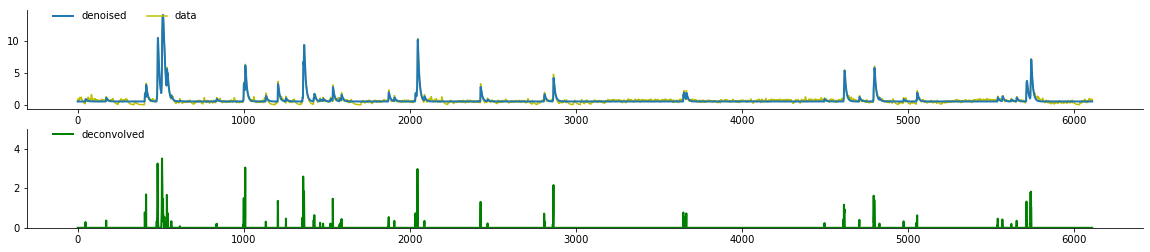

In [89]:
plt.figure(figsize=(20, 4))
plt.subplot(211)
plt.plot(b + c, lw=2, label='denoised')
plt.plot(numpyed_items, label='data', zorder=-12, c='y')
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.subplot(212)
plt.plot(s, lw=2, label='deconvolved', c='g')
plt.ylim(0, 5.0)
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.show()

In [90]:
numpyed_items = items['C001'].to_numpy()

In [95]:
%time c, s, b, g, lam = deconvolve(numpyed_items, g=(1.7,-.712), penalty=1)

CPU times: user 210 ms, sys: 12.2 ms, total: 222 ms
Wall time: 41.1 ms


In [96]:
g

(1.7, -0.712)

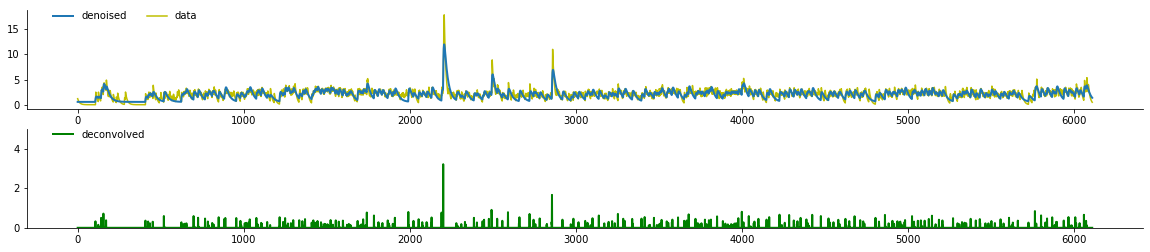

In [97]:
plt.figure(figsize=(20, 4))
plt.subplot(211)
plt.plot(b + c, lw=2, label='denoised')
plt.plot(numpyed_items, label='data', zorder=-12, c='y')
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.subplot(212)
plt.plot(s, lw=2, label='deconvolved', c='g')
plt.ylim(0, 5.0)
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.show()